In [19]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from PIL import Image

In [3]:
def prop(image,distance):
    pitch=7.56e-6
    wavelength=633e-9



    k=2*np.pi/wavelength

    #image=imageio.imread('44.bmp')+0j
    size=image.shape
    length=pitch*size[0]
    width=pitch*size[1]

    prop_mask=np.zeros((size[0],size[1]))
    kx_max=2*np.pi/length*size[0]
    ky_max=2*np.pi/width*size[1]
    kx_array=np.linspace(0,kx_max,size[0]).reshape(size[0],1)
    ky_array=np.linspace(0,ky_max,size[1]).reshape(1,size[1])
    prop_mask=np.exp(-1j*(kx_array**2+ky_array**2)*distance/2/k)
    fft=np.fft.fft2(image)
    leak_mask=1
    #leak_mask=(1-2*kx_array*distance/k/width)*(1-2*ky_array*distance/k/length)
    output=np.fft.ifft2(prop_mask*fft*leak_mask)
    
    return output

def prop_angle(image,a):
    #angle in degree
    
    pitch=7.56e-6
    wavelength=633e-9

    sin=np.sin(a/180*np.pi)
    cos=np.cos(a/180*np.pi)

    k=2*np.pi/wavelength

    #image=imageio.imread('44.bmp')+0j
    size=image.shape
    length=pitch*size[0]
    width=pitch*size[1]
    
    fft=np.fft.fft2(image)
    fft_new=np.zeros((size[0],size[1]))*1j
    
    for i in range(size[0]):
        for j in range(size[1]):
            if i==0 and j==0:
                fft_new[i,j]=fft[i,j]
            else:
                fx=fft[i,j]*i/np.sqrt(i**2+j**2)
                fy=fft[i,j]*j/np.sqrt(i**2+j**2)
                #fft_new[i,j]=np.sqrt(fx**2+fy**2)
                fft_new[i,j]=np.sqrt((cos*fx-np.pi*sin/k*(fx**2/length))**2+fy**2)
                if fft[i,j].real>0:
                    fft_new[i,j]=complex(np.abs(fft_new[i,j].real), fft[i,j].imag) 
                else:
                    fft_new[i,j]=complex(-np.abs(fft_new[i,j].real), fft[i,j].imag)
                if fft[i,j].imag>0:
                    fft_new[i,j]=complex(fft_new[i,j].real, np.abs(fft[i,j].imag))
                else:
                    fft_new[i,j]=complex(fft_new[i,j].real, -np.abs(fft[i,j].imag))
                    
                


    output=np.fft.ifft2(fft_new)
    
    return output
    

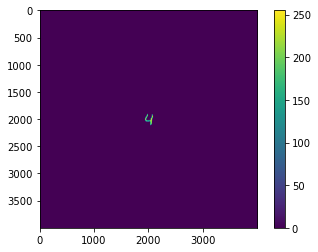

In [59]:
image=imageio.imread('4.png')[359:471,359:471]
image1=Image.fromarray(image)
image1=image1.resize((280,280),resample=0)
image3=np.array(image1)

image=np.zeros((4000,4000))
image[1860:2140,1860:2140]=image3

plt.imshow(image)
plt.colorbar()
plt.show()

In [78]:
pitch=7.6e-6
wavelength=650e-9
distance=0.164

k=2*np.pi/wavelength

#image=imageio.imread('44.bmp')+0j
size=image.shape
length=pitch*size[0]
width=pitch*size[1]

prop_mask=np.zeros((size[0],size[1]))*1j
kx_max=2*np.pi/length*size[0]
ky_max=2*np.pi/width*size[1]
kx_array=np.linspace(0,kx_max,size[0]).reshape(size[0],1)
ky_array=np.linspace(0,ky_max,size[1]).reshape(1,size[1])
prop_mask0=np.exp(-1j*np.sqrt(k**2-kx_array**2-ky_array**2)*distance)

prop_mask[int(size[0]/2):,int(size[1]/2):]=prop_mask0[:int(size[0]/2),:int(size[1]/2)]
prop_mask[:int(size[0]/2),:int(size[1]/2)]=np.flip(np.flip(prop_mask0[:int(size[0]/2),:int(size[1]/2)],axis=0),axis=1)
prop_mask[:int(size[0]/2),int(size[1]/2):]=np.flip(prop_mask0[:int(size[0]/2),:int(size[1]/2)],axis=0)
prop_mask[int(size[0]/2):,:int(size[1]/2)]=np.flip(prop_mask0[:int(size[0]/2),:int(size[1]/2)],axis=1)
fft=np.fft.fftshift(np.fft.fft2(image))
leak_mask=1
prop_mask1=np.fft.fftshift(prop_mask0)
#leak_mask=(1-2*kx_array*distance/k/width)*(1-2*ky_array*distance/k/length)
output=np.fft.ifft2(np.fft.ifftshift((prop_mask1*fft*leak_mask)))

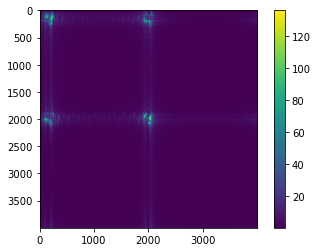

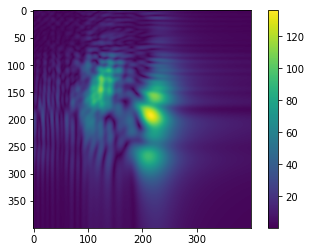

In [79]:
plt.imshow(np.abs(output))
plt.colorbar()
plt.show()
plt.imshow(np.abs(output[1800:2200,1800:2200]))
plt.colorbar()
plt.show()

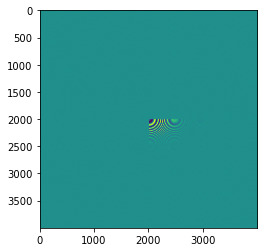

In [81]:
plt.imshow(np.real(prop_mask1))
plt.show()